## Importação das Bibliotecas

In [1]:
# instalando pandera, pois ele não vem no colab
!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importando bibliotecas
import pandas as pd
import pandera as pa
import numpy as np

In [3]:
# setando a quantidade de colunas da visualização
pd.set_option('display.max_columns',100)
# para setar a quantidade de linhas use: pd.set_option('display.max_rows')

## Extraindo a Base de Dados


In [5]:
# extraindo da origem
# passei a função parse_dates para a coluna 'Dt_Customer' 
# também passei o dayfirst, pois a coluna 'Dt_Customer' trouxe os dias primeiro (já que não existe mês 21 nem 19)
df = pd.read_csv('https://storage.googleapis.com/aulas-bc26-dados-gbs/marketing/marketing_campaign.csv%20-%20marketing_campaign.csv.csv',parse_dates=['Dt_Customer'], dayfirst=True)

In [6]:
# visualizando df
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [7]:
# verificando tipos de dados nas colunas
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

## Pré-análise

In [9]:
# analisando começo da planilha
# cheguei a conclusão de que para várias colunas 0 = False e 1 = True
# não as mudarei para boolean por questão de processamento 
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [8]:
# analisando final da planilha
df.tail(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [10]:
# verificação se há alguma coluna em que os dados são unicos 
print(df.ID.is_unique)
# foi verificado que a coluna ID tem valores únicos, porém não irei setá-la como rótulo
# usualmente se utiliza o rótulo padrão do pandas para facilitar a análise

True


## Tratamento de Dados

In [11]:
# backup do dataframe original
dfback = df.copy()

### Renomeando e reorganizando colunas

In [12]:
df.rename(columns={
    'ID':'id',
    'Year_Birth':'ano_nascimento',
    'Education':'escolaridade',
    'Marital_Status':'est_civil',
    'Income':'renda_anual',
    'Kidhome':'qtd_criancas',
    'Teenhome':'qtd_adolescentes',
    'Dt_Customer':'dia_inscricao',
    'Recency':'qtd_dias_ultima_compra',
    'MntWines':'vgasto_vinho',
    'MntFruits':'vgasto_frutas',
    'MntMeatProducts':'vgasto_carne',
    'MntFishProducts':'vgasto_peixe',
    'MntSweetProducts':'vgasto_doce',
    'MntGoldProds':'vgasto_ouro',
    'NumDealsPurchases':'ncompras_desconto',
    'NumWebPurchases':'ncompras_site',
    'NumCatalogPurchases':'ncompras_catalogo',
    'NumStorePurchases':'ncompras_loja',
    'NumWebVisitsMonth':'nvisita_mes_site',
    'AcceptedCmp3':'acc_oferta3',
    'AcceptedCmp4':'acc_oferta4',
    'AcceptedCmp5':'acc_oferta5',
    'AcceptedCmp1':'acc_oferta1',
    'AcceptedCmp2':'acc_oferta2',
    'Complain':'reclamacao',
    'Z_CostContact':'custo_contato',
    'Z_Revenue':'receita_pos',
    'Response':'acc_ofertafinal'
    }, inplace=True)

In [13]:
# criando coluna com a soma de crianças e adolescentes formando dependentes
df['total_dependentes'] = df['qtd_criancas'] + df['qtd_adolescentes']

In [14]:
# criando coluna com range de idades
# considerando o range de datas no momento da inscrição, 
# consideramos as idades delas no ano mais altual 

df['grupo_idade1'] = 2014 - df['ano_nascimento'] 

for i in range(2240):
  if (df.loc[i, 'grupo_idade1']) < 21:
    (df.loc[i,'grupo_idade']) = "jovem"
  if (df.loc[i, 'grupo_idade1']) > 20 and (df.loc[i, 'grupo_idade1']) < 60:
    (df.loc[i,'grupo_idade']) = "adulto"
  if (df.loc[i, 'grupo_idade1']) > 59:
    (df.loc[i,'grupo_idade']) = "idoso"

In [20]:
# analisando colunas foram renomeadas e se as novas criadas
df.head(1)

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
0,5524,2012-09-04,1957,adulto,Graduation,Single,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0,3,11


In [16]:
# reorganizando ordem das colunas 
df = df[['id',
         'dia_inscricao',
         'ano_nascimento',
         'grupo_idade',
         'escolaridade',
         'est_civil',
         'renda_anual',
         'qtd_criancas',
         'qtd_adolescentes',
         'total_dependentes',
         'qtd_dias_ultima_compra',
         'vgasto_vinho',
         'vgasto_frutas',
         'vgasto_carne',
         'vgasto_peixe',
         'vgasto_doce',
         'vgasto_ouro',
         'ncompras_desconto',
         'ncompras_catalogo',
         'ncompras_loja',
         'ncompras_site',
         'nvisita_mes_site',
         'acc_oferta1', 
         'acc_oferta2',
         'acc_oferta3',
         'acc_oferta4',
         'acc_oferta5',
         'acc_ofertafinal',
         'reclamacao',
         'custo_contato',
         'receita_pos']]

In [17]:
# analisando se as colunas estão na ordem certa
df.head(1)

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
0,5524,2012-09-04,1957,adulto,Graduation,Single,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0,3,11


### Procurando valores únicos e inconsistentes

In [18]:
# encontrado id = 0
sorted(pd.unique(df['id'])) 

[0,
 1,
 9,
 13,
 17,
 20,
 22,
 24,
 25,
 35,
 48,
 49,
 55,
 67,
 73,
 75,
 78,
 87,
 89,
 92,
 113,
 115,
 123,
 125,
 143,
 146,
 153,
 158,
 164,
 175,
 176,
 178,
 182,
 193,
 194,
 195,
 199,
 202,
 203,
 213,
 217,
 221,
 231,
 232,
 234,
 236,
 238,
 241,
 246,
 247,
 252,
 254,
 255,
 257,
 263,
 269,
 271,
 273,
 274,
 286,
 291,
 295,
 304,
 309,
 310,
 313,
 322,
 326,
 332,
 339,
 340,
 347,
 359,
 361,
 367,
 368,
 375,
 378,
 380,
 387,
 405,
 425,
 433,
 437,
 448,
 450,
 451,
 453,
 454,
 455,
 456,
 460,
 466,
 477,
 486,
 492,
 498,
 500,
 503,
 520,
 521,
 523,
 524,
 528,
 531,
 535,
 538,
 544,
 550,
 564,
 569,
 574,
 577,
 590,
 591,
 606,
 607,
 610,
 615,
 618,
 624,
 626,
 635,
 640,
 641,
 642,
 663,
 675,
 679,
 692,
 697,
 701,
 702,
 709,
 713,
 716,
 736,
 737,
 738,
 749,
 760,
 762,
 771,
 773,
 793,
 796,
 798,
 800,
 803,
 807,
 810,
 819,
 821,
 830,
 832,
 833,
 837,
 839,
 843,
 849,
 850,
 851,
 868,
 873,
 879,
 880,
 891,
 895,
 898,
 902,
 90

In [21]:
# verificando id zerada
ftid = df.id == 0
df.loc[ftid]
# os dados existem, então deixamos como está

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
214,0,2013-05-04,1985,adulto,Graduation,Married,70951.0,0,0,0,66,239,10,554,254,87,54,1,4,9,3,1,0,0,0,0,0,0,0,3,11


In [22]:
# dados ok
# range encontrado: 30-07-2012 a 29-06-2014
sorted(pd.unique(df['dia_inscricao']))

[numpy.datetime64('2012-07-30T00:00:00.000000000'),
 numpy.datetime64('2012-07-31T00:00:00.000000000'),
 numpy.datetime64('2012-08-01T00:00:00.000000000'),
 numpy.datetime64('2012-08-02T00:00:00.000000000'),
 numpy.datetime64('2012-08-03T00:00:00.000000000'),
 numpy.datetime64('2012-08-04T00:00:00.000000000'),
 numpy.datetime64('2012-08-05T00:00:00.000000000'),
 numpy.datetime64('2012-08-06T00:00:00.000000000'),
 numpy.datetime64('2012-08-07T00:00:00.000000000'),
 numpy.datetime64('2012-08-08T00:00:00.000000000'),
 numpy.datetime64('2012-08-09T00:00:00.000000000'),
 numpy.datetime64('2012-08-10T00:00:00.000000000'),
 numpy.datetime64('2012-08-11T00:00:00.000000000'),
 numpy.datetime64('2012-08-12T00:00:00.000000000'),
 numpy.datetime64('2012-08-13T00:00:00.000000000'),
 numpy.datetime64('2012-08-14T00:00:00.000000000'),
 numpy.datetime64('2012-08-15T00:00:00.000000000'),
 numpy.datetime64('2012-08-16T00:00:00.000000000'),
 numpy.datetime64('2012-08-17T00:00:00.000000000'),
 numpy.datet

In [23]:
# ponto de atenção: encontramos pessoas com idades de mais de 120 anos na data da pesquisa
sorted(pd.unique(df['ano_nascimento']))

[1893,
 1899,
 1900,
 1940,
 1941,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996]

In [24]:
# verificando idades estranhas
ftidade1 = df.ano_nascimento == 1893
ftidade2 = df.ano_nascimento == 1899
ftidade3 = df.ano_nascimento == 1900
df.loc[ftidade1 | ftidade2 | ftidade3]
# apesar dos anos serem estranhos, os dados existem nas colunas
# então não droparei as linhas nem modificarei os anos

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
192,7829,2013-09-26,1900,idoso,2n Cycle,Divorced,36640.0,1,0,1,99,15,6,8,7,4,25,1,1,2,2,5,0,0,0,0,0,0,1,3,11
239,11004,2014-05-17,1893,idoso,2n Cycle,Single,60182.0,0,1,1,23,8,0,5,7,0,2,1,0,2,1,4,0,0,0,0,0,0,0,3,11
339,1150,2013-09-26,1899,idoso,PhD,Together,83532.0,0,0,0,36,755,144,562,104,64,224,1,6,4,4,1,0,0,0,0,1,0,0,3,11


In [25]:
# dados em inglês, fazer tradução com cuidado
sorted(pd.unique(df['escolaridade']))

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [26]:
# pelas diferenças entre as culturas dos EUA e Brasil, 
# não há referências o sufuciente para traduções concretas, então deixamos alguns dados com tradução literal
df.escolaridade.replace(['2n Cycle'],'segundo ciclo',inplace=True) 
df.escolaridade.replace(['Basic'],'ensino basico',inplace=True)
df.escolaridade.replace(['Master'],'mestrado',inplace=True)
df.escolaridade.replace(['Graduation'],'graduacao',inplace=True)
df.escolaridade.replace(['PhD'],'phd',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
df

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
0,5524,2012-09-04,1957,adulto,graduacao,Single,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0,3,11
1,2174,2014-03-08,1954,idoso,graduacao,Single,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0,3,11
2,4141,2013-08-21,1965,adulto,graduacao,Together,71613.0,0,0,0,26,426,49,127,111,21,42,1,2,10,8,4,0,0,0,0,0,0,0,3,11
3,6182,2014-02-10,1984,adulto,graduacao,Together,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0,3,11
4,5324,2014-01-19,1981,adulto,phd,Married,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,adulto,graduacao,Married,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0,3,11
2236,4001,2014-06-10,1946,idoso,phd,Together,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0,3,11
2237,7270,2014-01-25,1981,adulto,graduacao,Divorced,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0,3,11
2238,8235,2014-01-24,1956,adulto,mestrado,Together,69245.0,0,1,1,8,428,30,214,80,30,61,2,5,10,6,3,0,0,0,0,0,0,0,3,11


In [28]:
# algumas incosistências encontradas: Absurd, Alone, Together e YOLO 
# vamos traduzir os dados 
sorted(pd.unique(df['est_civil']))

['Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO']

In [29]:
# verificando quantidade de valor
df.groupby(df['est_civil']).size()

est_civil
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [30]:
# vendo as inconsistências da coluna est_civil
ftecivil1 = df.est_civil == 'Absurd'
ftecivil2 = df.est_civil == 'Alone'
ftecivil3 = df.est_civil == 'Together'
ftecivil4 = df.est_civil == 'YOLO'
df.loc[ftecivil1 | ftecivil2 | ftecivil4]
# aparentemente as linhas 2177 e 2202 contém os mesmos dados

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
131,433,2013-03-10,1958,adulto,mestrado,Alone,61331.0,1,1,2,42,534,5,47,0,5,41,5,1,6,11,8,0,0,0,0,0,0,0,3,11
138,7660,2014-05-19,1973,adulto,phd,Alone,35860.0,1,1,2,37,15,0,8,4,2,20,2,1,2,1,5,0,0,1,0,0,1,0,3,11
153,92,2014-05-12,1988,adulto,graduacao,Alone,34176.0,1,0,1,12,5,7,24,19,14,20,4,0,4,3,6,0,0,0,0,0,0,0,3,11
2093,7734,2012-12-19,1993,adulto,graduacao,Absurd,79244.0,0,0,0,58,471,102,125,212,61,245,1,10,7,4,1,1,0,0,0,1,1,0,3,11
2134,4369,2014-01-10,1957,adulto,mestrado,Absurd,65487.0,0,0,0,48,240,67,500,199,0,163,3,5,6,3,2,0,0,0,0,0,0,0,3,11
2177,492,2012-10-18,1973,adulto,phd,YOLO,48432.0,0,1,1,3,322,3,50,4,3,42,5,1,6,7,8,0,0,0,0,0,0,0,3,11
2202,11133,2012-10-18,1973,adulto,phd,YOLO,48432.0,0,1,1,3,322,3,50,4,3,42,5,1,6,7,8,0,0,0,0,0,1,0,3,11


In [31]:
# então droparemos a linha 2177 por serem dados mais antigos
df.drop(2177, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
# por não saber do que se trata Absurd, Alone, Together e YOLO, preferi deixar estes dados como estão 
# já que são muito poucos em relação ao tamanho da tabela
df.est_civil.replace(['Absurd'],'absurdo',inplace=True) 
df.est_civil.replace(['Alone'],'sozinho/a',inplace=True)
df.est_civil.replace(['Divorced'],'divorciado/a',inplace=True)
df.est_civil.replace(['Married'],'casado/a',inplace=True)
df.est_civil.replace(['Single'],'solteiro/a',inplace=True)
df.est_civil.replace(['Together'],'uniao',inplace=True)
# considerarei widow como viuvo apesar de significar viuva, apenas para seguir o padrão pt/br que usa masculino
df.est_civil.replace(['Widow'],'viuvo/a',inplace=True)
df.est_civil.replace(['YOLO'],'yolo',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
df

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0,3,11
1,2174,2014-03-08,1954,idoso,graduacao,solteiro/a,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0,3,11
2,4141,2013-08-21,1965,adulto,graduacao,uniao,71613.0,0,0,0,26,426,49,127,111,21,42,1,2,10,8,4,0,0,0,0,0,0,0,3,11
3,6182,2014-02-10,1984,adulto,graduacao,uniao,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0,3,11
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,adulto,graduacao,casado/a,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0,3,11
2236,4001,2014-06-10,1946,idoso,phd,uniao,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0,3,11
2237,7270,2014-01-25,1981,adulto,graduacao,divorciado/a,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0,3,11
2238,8235,2014-01-24,1956,adulto,mestrado,uniao,69245.0,0,1,1,8,428,30,214,80,30,61,2,5,10,6,3,0,0,0,0,0,0,0,3,11


In [34]:
# pontos de atenção: valores NaN
sorted(pd.unique(df['renda_anual']))

[1730.0,
 2447.0,
 5648.0,
 7500.0,
 9548.0,
 10245.0,
 10404.0,
 10979.0,
 12571.0,
 14045.0,
 14515.0,
 14849.0,
 15033.0,
 15287.0,
 15345.0,
 16248.0,
 16626.0,
 17323.0,
 18100.0,
 18492.0,
 18589.0,
 18701.0,
 18890.0,
 19510.0,
 19789.0,
 19986.0,
 20130.0,
 20518.0,
 20559.0,
 21918.0,
 21994.0,
 22010.0,
 22070.0,
 22212.0,
 22574.0,
 22585.0,
 22804.0,
 23228.0,
 23295.0,
 23442.0,
 23559.0,
 23616.0,
 23626.0,
 23661.0,
 23718.0,
 23957.0,
 23976.0,
 24027.0,
 24072.0,
 24279.0,
 24480.0,
 24594.0,
 24882.0,
 25271.0,
 25545.0,
 25721.0,
 26091.0,
 26095.0,
 26304.0,
 26326.0,
 26490.0,
 26646.0,
 27038.0,
 27190.0,
 27203.0,
 27213.0,
 27255.0,
 27421.0,
 27938.0,
 28249.0,
 28332.0,
 28442.0,
 28457.0,
 28691.0,
 28718.0,
 28839.0,
 29315.0,
 29440.0,
 29548.0,
 29604.0,
 29672.0,
 29760.0,
 29938.0,
 29999.0,
 30015.0,
 30096.0,
 30279.0,
 30351.0,
 30372.0,
 30477.0,
 30507.0,
 30523.0,
 30630.0,
 30631.0,
 30675.0,
 30732.0,
 30753.0,
 30822.0,
 30833.0,
 30899.0,
 3099

In [35]:
# filtrando os valores nulos ou ausentes | NA , NULL , NaN , NaT e etc
filtronulo = df.renda_anual.isna()
df.loc[filtronulo]

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao,custo_contato,receita_pos
10,1994,2013-11-15,1983,adulto,graduacao,casado/a,NaN,1,0,1,11,5,5,6,0,2,1,1,0,2,1,7,0,0,0,0,0,0,0,3,11
27,5255,2013-02-20,1986,adulto,graduacao,solteiro/a,NaN,1,0,1,19,5,1,3,3,263,362,0,0,0,27,1,0,0,0,0,0,0,0,3,11
43,7281,2013-11-05,1959,adulto,phd,solteiro/a,NaN,0,0,0,80,81,11,50,3,2,39,1,3,4,1,2,0,0,0,0,0,0,0,3,11
48,7244,2014-01-01,1951,idoso,graduacao,solteiro/a,NaN,2,1,3,96,48,5,48,6,10,7,3,1,4,2,6,0,0,0,0,0,0,0,3,11
58,8557,2013-06-17,1982,adulto,graduacao,solteiro/a,NaN,1,0,1,57,11,3,22,2,2,6,2,0,3,2,6,0,0,0,0,0,0,0,3,11
71,10629,2012-09-14,1973,adulto,segundo ciclo,casado/a,NaN,1,0,1,25,25,3,43,17,4,17,3,0,3,3,8,0,0,0,0,0,0,0,3,11
90,8996,2012-11-19,1957,adulto,phd,casado/a,NaN,2,1,3,4,230,42,192,49,37,53,12,2,8,7,9,0,0,0,0,0,0,0,3,11
91,9235,2014-05-27,1957,adulto,graduacao,solteiro/a,NaN,1,1,2,45,7,0,8,2,0,1,1,0,2,1,7,0,0,0,0,0,0,0,3,11
92,5798,2013-11-23,1973,adulto,mestrado,uniao,NaN,0,0,0,87,445,37,359,98,28,18,1,4,8,2,1,0,0,0,0,0,0,0,3,11
128,8268,2013-07-11,1961,adulto,phd,casado/a,NaN,0,1,1,23,352,0,27,10,0,15,3,1,7,6,6,0,0,0,0,0,0,0,3,11


In [36]:
# somar e exibir os valores ausentes no DF
df.isna().sum()
# por proporção a quantidade de valores NA não farão muita diferença na nossa análise
# então deixamos como está

id                         0
dia_inscricao              0
ano_nascimento             0
grupo_idade                0
escolaridade               0
est_civil                  0
renda_anual               24
qtd_criancas               0
qtd_adolescentes           0
total_dependentes          0
qtd_dias_ultima_compra     0
vgasto_vinho               0
vgasto_frutas              0
vgasto_carne               0
vgasto_peixe               0
vgasto_doce                0
vgasto_ouro                0
ncompras_desconto          0
ncompras_catalogo          0
ncompras_loja              0
ncompras_site              0
nvisita_mes_site           0
acc_oferta1                0
acc_oferta2                0
acc_oferta3                0
acc_oferta4                0
acc_oferta5                0
acc_ofertafinal            0
reclamacao                 0
custo_contato              0
receita_pos                0
dtype: int64

In [37]:
# dados ok
# sorted(pd.unique(df['qtd_criancas']))
# sorted(pd.unique(df['qtd_adolescentes']))
# sorted(pd.unique(df['total_dependentes']))
# sorted(pd.unique(df['qtd_dias_ultima_compra']))
# sorted(pd.unique(df['vgasto_vinho']))
# sorted(pd.unique(df['vgasto_frutas']))
# sorted(pd.unique(df['vgasto_carne']))
# sorted(pd.unique(df['vgasto_peixe']))
# sorted(pd.unique(df['vgasto_doce']))
# sorted(pd.unique(df['vgasto_ouro']))
# sorted(pd.unique(df['ncompras_desconto']))
# sorted(pd.unique(df['ncompras_catalogo']))
# sorted(pd.unique(df['ncompras_loja']))
# sorted(pd.unique(df['ncompras_site']))
# sorted(pd.unique(df['nvisita_mes_site']))
# sorted(pd.unique(df['acc_oferta1']))
# sorted(pd.unique(df['acc_oferta2']))
# sorted(pd.unique(df['acc_oferta3']))
# sorted(pd.unique(df['acc_oferta4']))
# sorted(pd.unique(df['acc_oferta5']))
# sorted(pd.unique(df['acc_ofertafinal']))
# sorted(pd.unique(df['reclamacao']))

In [38]:
# analisei que nessas duas colunas haviam apenas um valor
sorted(pd.unique(df['custo_contato']))
sorted(pd.unique(df['receita_pos']))

[11]

In [39]:
# fazendo drop de colunas com valores que são todos iguais
df.drop(['custo_contato', 'receita_pos'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
# analisando se as colunas foram descartadas
df

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0
1,2174,2014-03-08,1954,idoso,graduacao,solteiro/a,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0
2,4141,2013-08-21,1965,adulto,graduacao,uniao,71613.0,0,0,0,26,426,49,127,111,21,42,1,2,10,8,4,0,0,0,0,0,0,0
3,6182,2014-02-10,1984,adulto,graduacao,uniao,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,adulto,graduacao,casado/a,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0
2236,4001,2014-06-10,1946,idoso,phd,uniao,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0
2237,7270,2014-01-25,1981,adulto,graduacao,divorciado/a,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0
2238,8235,2014-01-24,1956,adulto,mestrado,uniao,69245.0,0,1,1,8,428,30,214,80,30,61,2,5,10,6,3,0,0,0,0,0,0,0


## Validação de Dados

In [41]:
df.dtypes

id                                 int64
dia_inscricao             datetime64[ns]
ano_nascimento                     int64
grupo_idade                       object
escolaridade                      object
est_civil                         object
renda_anual                      float64
qtd_criancas                       int64
qtd_adolescentes                   int64
total_dependentes                  int64
qtd_dias_ultima_compra             int64
vgasto_vinho                       int64
vgasto_frutas                      int64
vgasto_carne                       int64
vgasto_peixe                       int64
vgasto_doce                        int64
vgasto_ouro                        int64
ncompras_desconto                  int64
ncompras_catalogo                  int64
ncompras_loja                      int64
ncompras_site                      int64
nvisita_mes_site                   int64
acc_oferta1                        int64
acc_oferta2                        int64
acc_oferta3     

In [42]:
# criando schema de validação de dados
schema = pa.DataFrameSchema(
    columns = {
        'id':pa.Column(pa.Int),
        'dia_inscricao':pa.Column(pa.DateTime),
        'ano_nascimento':pa.Column(pa.Int),
        'grupo_idade':pa.Column(pa.String),
        'escolaridade':pa.Column(pa.String),
        'est_civil':pa.Column(pa.String),
        'renda_anual':pa.Column(pa.Float,nullable=True),
        'qtd_criancas':pa.Column(pa.Int),
        'qtd_adolescentes':pa.Column(pa.Int),
        'total_dependentes':pa.Column(pa.Int),
        'qtd_dias_ultima_compra':pa.Column(pa.Int),
        'vgasto_vinho':pa.Column(pa.Int),
        'vgasto_frutas':pa.Column(pa.Int),
        'vgasto_carne':pa.Column(pa.Int),
        'vgasto_peixe':pa.Column(pa.Int),
        'vgasto_doce':pa.Column(pa.Int),
        'vgasto_ouro':pa.Column(pa.Int),
        'ncompras_desconto':pa.Column(pa.Int),
        'ncompras_catalogo':pa.Column(pa.Int),
        'ncompras_loja':pa.Column(pa.Int),
        'ncompras_site':pa.Column(pa.Int),
        'nvisita_mes_site':pa.Column(pa.Int),
        'acc_oferta1':pa.Column(pa.Int), 
        'acc_oferta2':pa.Column(pa.Int),
        'acc_oferta3':pa.Column(pa.Int),
        'acc_oferta4':pa.Column(pa.Int),
        'acc_oferta5':pa.Column(pa.Int),
        'acc_ofertafinal':pa.Column(pa.Int),
        'reclamacao':pa.Column(pa.Int)
    }
)

In [43]:
# validador do DF
schema.validate(df)

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0
1,2174,2014-03-08,1954,idoso,graduacao,solteiro/a,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0
2,4141,2013-08-21,1965,adulto,graduacao,uniao,71613.0,0,0,0,26,426,49,127,111,21,42,1,2,10,8,4,0,0,0,0,0,0,0
3,6182,2014-02-10,1984,adulto,graduacao,uniao,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,adulto,graduacao,casado/a,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0
2236,4001,2014-06-10,1946,idoso,phd,uniao,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0
2237,7270,2014-01-25,1981,adulto,graduacao,divorciado/a,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0
2238,8235,2014-01-24,1956,adulto,mestrado,uniao,69245.0,0,1,1,8,428,30,214,80,30,61,2,5,10,6,3,0,0,0,0,0,0,0


In [44]:
# fazendo um load do df limpo
# utilizando index false, pois o rótulo é o padrão do pandas
df.to_csv('marketing_campaing.csv',index=False)

## Filtros

In [45]:
df.describe()
# std = desvio padrão

,id,ano_nascimento,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
count,2239.000000,2239.000000,2215.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5594.437695,1968.803930,52248.973815,0.444395,0.506029,0.950424,49.129969,303.927646,26.312640,167.002233,37.540420,27.073694,44.022778,2.323805,2.662796,5.790085,4.083519,5.315319,0.064314,0.013399,0.072800,0.074587,0.072800,0.149174,0.009379
std,3245.596624,11.986419,25178.630378,0.538436,0.544560,0.751970,28.952514,336.672368,39.779268,225.752254,54.636585,41.286586,52.179075,1.931841,2.923542,3.251681,2.778651,2.426524,0.245367,0.115001,0.259867,0.262782,0.259867,0.356339,0.096412
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2830.000000,1959.000000,35284.000000,0.000000,0.000000,0.000000,24.000000,23.500000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5462.000000,1970.000000,51390.000000,0.000000,0.000000,1.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,2.000000,5.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8428.500000,1977.000000,68557.000000,1.000000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,4.000000,8.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,3.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,28.000000,13.000000,27.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.dtypes

id                                 int64
dia_inscricao             datetime64[ns]
ano_nascimento                     int64
grupo_idade                       object
escolaridade                      object
est_civil                         object
renda_anual                      float64
qtd_criancas                       int64
qtd_adolescentes                   int64
total_dependentes                  int64
qtd_dias_ultima_compra             int64
vgasto_vinho                       int64
vgasto_frutas                      int64
vgasto_carne                       int64
vgasto_peixe                       int64
vgasto_doce                        int64
vgasto_ouro                        int64
ncompras_desconto                  int64
ncompras_catalogo                  int64
ncompras_loja                      int64
ncompras_site                      int64
nvisita_mes_site                   int64
acc_oferta1                        int64
acc_oferta2                        int64
acc_oferta3     

In [47]:
# filtro de escolaridade phd
ftphd = df.escolaridade == 'phd'
dfphd = df.loc[ftphd]
dfphd

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0
7,6177,2013-05-08,1985,adulto,phd,casado/a,33454.0,1,0,1,32,76,10,56,3,1,23,2,0,4,4,8,0,0,0,0,0,0,0
8,4855,2013-06-06,1974,adulto,phd,uniao,30351.0,1,0,1,19,14,0,24,3,3,2,1,0,2,3,9,0,0,0,0,0,1,0
9,5899,2014-03-13,1950,idoso,phd,uniao,5648.0,1,1,2,68,28,0,6,1,1,13,1,0,0,1,20,0,0,1,0,0,0,0
15,2114,2012-11-24,1946,idoso,phd,solteiro/a,82800.0,0,0,0,23,1006,22,115,59,68,45,1,6,12,7,3,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,11133,2012-10-18,1973,adulto,phd,yolo,48432.0,0,1,1,3,322,3,50,4,3,42,5,1,6,7,8,0,0,0,0,0,1,0
2217,9589,2014-04-05,1948,idoso,phd,viuvo/a,82032.0,0,0,0,54,332,194,377,149,125,57,0,6,7,4,1,0,0,0,0,0,0,0
2224,4286,2014-01-09,1970,adulto,phd,solteiro/a,57642.0,0,1,1,24,580,6,58,8,0,27,3,6,6,7,4,0,0,1,0,0,0,0
2236,4001,2014-06-10,1946,idoso,phd,uniao,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0


In [48]:
# analisando a média de renda e média de qtd de dependentes de pessoas com phd
dffiltrado = df.loc[ftphd,['renda_anual','total_dependentes']]
dffiltrado.mean()

renda_anual          56161.383333
total_dependentes        1.000000
dtype: float64

In [49]:
# filtro mais detalhado 
ftdependentes = df.total_dependentes == 2
ftestcivil = df.est_civil == 'casado/a'
ftnascimento = df.ano_nascimento == 1965
dffiltrado1 = df.loc[ftdependentes & ftestcivil & ftnascimento]
dffiltrado1

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
346,8553,2013-06-23,1965,adulto,graduacao,casado/a,44300.0,1,1,2,65,30,0,9,0,0,3,2,0,3,1,6,0,0,0,0,0,0,0
405,194,2014-06-09,1965,adulto,graduacao,casado/a,48006.0,1,1,2,55,23,0,11,3,2,2,1,0,3,1,6,0,0,0,0,0,0,0
1094,6466,2014-03-12,1965,adulto,phd,casado/a,57236.0,1,1,2,22,105,0,9,2,1,4,3,1,4,2,3,0,0,0,0,0,0,0
1109,246,2014-05-31,1965,adulto,graduacao,casado/a,66480.0,1,1,2,71,199,9,57,20,21,6,7,1,7,4,4,0,0,0,0,0,0,0
1186,10466,2013-08-22,1965,adulto,graduacao,casado/a,44393.0,1,1,2,86,24,2,20,2,2,10,2,0,4,1,4,0,0,0,0,0,0,0
1929,1518,2013-06-17,1965,adulto,mestrado,casado/a,62694.0,1,1,2,29,379,6,157,25,91,91,5,3,7,9,7,0,0,0,0,0,0,0


In [50]:
# filtro de estado civil solteiro
ftestcivil= df.est_civil == 'solteiro/a'
dfestcivil = df.loc[ftestcivil]
dfestcivil

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0
1,2174,2014-03-08,1954,idoso,graduacao,solteiro/a,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0
15,2114,2012-11-24,1946,idoso,phd,solteiro/a,82800.0,0,0,0,23,1006,22,115,59,68,45,1,6,12,7,3,1,0,0,0,1,1,0
19,2278,2012-11-03,1985,adulto,segundo ciclo,solteiro/a,33812.0,1,0,1,86,4,17,19,30,24,39,2,1,3,2,6,0,0,0,0,0,0,0
25,7892,2013-01-02,1969,adulto,graduacao,solteiro/a,18589.0,0,0,0,89,6,4,25,15,12,13,2,1,3,2,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4286,2014-01-09,1970,adulto,phd,solteiro/a,57642.0,0,1,1,24,580,6,58,8,0,27,3,6,6,7,4,0,0,1,0,0,0,0
2227,4201,2013-03-03,1962,adulto,graduacao,solteiro/a,57967.0,0,1,1,39,229,7,137,4,0,91,5,2,8,4,5,0,0,0,0,0,0,0
2230,7004,2013-03-16,1984,adulto,graduacao,solteiro/a,11012.0,1,0,1,82,24,3,26,7,1,23,3,1,2,3,9,0,0,1,0,0,0,0
2231,9817,2012-08-21,1970,adulto,mestrado,solteiro/a,44802.0,0,0,0,71,853,10,143,13,10,20,2,4,12,9,8,0,0,0,0,0,0,0


In [51]:
# analisando a média de renda anual e média de  valor gasto com vinho das pessoas solteiras
dffiltrado2 = df.loc[ftestcivil,['renda_anual', 'vgasto_vinho']]
dffiltrado2.mean()

renda_anual     50995.350318
vgasto_vinho      288.331250
dtype: float64

In [52]:
# analisando média de valores gastos por categoria de pessoas nascidas em 1985
ftnascimento = df.ano_nascimento == 1985
dffiltrado3 = df.loc[ftnascimento,['ano_nascimento','vgasto_vinho', 'vgasto_frutas','vgasto_carne','vgasto_peixe','vgasto_doce','vgasto_ouro']]
dffiltrado3.mean()

ano_nascimento    1985.00000
vgasto_vinho       162.18750
vgasto_frutas       18.18750
vgasto_carne       117.28125
vgasto_peixe        24.75000
vgasto_doce         13.96875
vgasto_ouro         27.96875
dtype: float64

In [53]:
dffiltrado3

,ano_nascimento,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro
7,1985,76,10,56,3,1,23
19,1985,4,17,19,30,24,39
41,1985,13,1,29,3,0,7
80,1985,64,4,68,7,5,17
122,1985,9,0,7,3,4,7
214,1985,239,10,554,254,87,54
251,1985,3,3,7,0,2,11
317,1985,91,64,128,65,3,50
381,1985,3,6,5,0,2,6
503,1985,1047,0,140,67,38,153


In [54]:
# filtrando pessoas que gastaram mais de 500 dolares em vinho
ftvinho = df.vgasto_vinho > 500
dfvinho = df.loc[ftvinho]
dfvinho

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0
5,7446,2013-09-09,1967,adulto,mestrado,uniao,62513.0,0,1,1,16,520,42,98,0,42,14,2,4,10,6,6,0,0,0,0,0,0,0
15,2114,2012-11-24,1946,idoso,phd,solteiro/a,82800.0,0,0,0,23,1006,22,115,59,68,45,1,6,12,7,3,1,0,0,0,1,1,0
18,6565,2013-03-28,1949,idoso,mestrado,casado/a,76995.0,0,1,1,91,1012,80,498,0,16,176,2,4,9,11,5,1,0,0,0,0,0,0
22,1993,2012-12-23,1949,idoso,phd,casado/a,58607.0,0,1,1,63,867,0,86,0,0,19,3,3,9,2,8,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,7366,2013-07-04,1982,adulto,mestrado,solteiro/a,75777.0,0,0,0,12,712,26,538,69,13,80,1,6,11,3,1,0,0,0,1,1,1,0
2224,4286,2014-01-09,1970,adulto,phd,solteiro/a,57642.0,0,1,1,24,580,6,58,8,0,27,3,6,6,7,4,0,0,1,0,0,0,0
2231,9817,2012-08-21,1970,adulto,mestrado,solteiro/a,44802.0,0,0,0,71,853,10,143,13,10,20,2,4,12,9,8,0,0,0,0,0,0,0
2235,10870,2013-06-13,1967,adulto,graduacao,casado/a,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0


In [55]:
# filtros de anos de incrição
ft2012 = df.dia_inscricao.dt.year == 2012
ft2013 = df.dia_inscricao.dt.year == 2013
ft2014 = df.dia_inscricao.dt.year == 2014
df2014 = df.loc[ft2014]
df2014

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
1,2174,2014-03-08,1954,idoso,graduacao,solteiro/a,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0
3,6182,2014-02-10,1984,adulto,graduacao,uniao,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0
9,5899,2014-03-13,1950,idoso,phd,uniao,5648.0,1,1,2,68,28,0,6,1,1,13,1,0,0,1,20,0,0,1,0,0,0,0
23,4047,2014-01-11,1954,idoso,phd,casado/a,65324.0,0,1,1,0,384,0,102,21,32,5,3,2,9,6,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4286,2014-01-09,1970,adulto,phd,solteiro/a,57642.0,0,1,1,24,580,6,58,8,0,27,3,6,6,7,4,0,0,1,0,0,0,0
2229,10084,2014-05-18,1972,adulto,graduacao,casado/a,24434.0,2,0,2,9,3,2,8,20,0,17,2,1,2,2,7,0,0,0,0,0,0,0
2236,4001,2014-06-10,1946,idoso,phd,uniao,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0
2237,7270,2014-01-25,1981,adulto,graduacao,divorciado/a,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0


In [56]:
# filtrando jovens
ftgidade = df.grupo_idade == 'jovem'
dfjovem = df.loc[ftgidade]
dfjovem

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
46,9909,2012-11-09,1996,jovem,segundo ciclo,casado/a,7500.0,0,0,0,24,3,18,14,15,22,50,3,1,3,3,9,0,0,0,0,0,1,0
417,5067,2014-02-14,1994,jovem,graduacao,uniao,80134.0,0,0,0,11,966,26,282,52,26,26,1,7,11,2,5,1,1,0,1,1,0,0
696,8315,2014-03-26,1995,jovem,graduacao,solteiro/a,34824.0,0,0,0,65,4,2,11,2,0,4,1,0,2,1,6,0,0,0,0,0,0,0
747,10548,2014-03-09,1995,jovem,graduacao,solteiro/a,71163.0,0,0,0,30,283,17,372,138,106,44,1,8,12,3,1,0,0,0,0,0,0,0
914,10619,2012-12-03,1994,jovem,graduacao,solteiro/a,95529.0,0,0,0,29,770,29,890,250,27,24,1,3,7,7,3,0,0,0,0,1,1,0
995,5184,2014-03-26,1995,jovem,graduacao,solteiro/a,34824.0,0,0,0,65,4,2,11,2,0,4,1,0,2,1,6,0,0,0,0,0,0,0
1163,6905,2012-08-22,1994,jovem,graduacao,uniao,80685.0,0,0,0,55,241,45,604,34,26,54,1,4,10,6,2,0,0,0,0,0,0,0
1170,193,2014-02-17,1996,jovem,ensino basico,casado/a,14421.0,0,0,0,81,0,0,2,3,3,8,1,0,2,1,5,0,0,1,0,0,0,0
1850,4427,2012-09-18,1995,jovem,segundo ciclo,solteiro/a,83257.0,0,0,0,56,536,27,590,38,107,67,1,10,12,5,6,0,0,1,0,1,1,1
2213,3661,2012-10-12,1995,jovem,segundo ciclo,solteiro/a,80617.0,0,0,0,42,594,51,631,72,55,32,1,6,8,4,2,0,0,0,0,0,0,0


In [57]:
# filtro aceitação da oferta 5
ftoferta5 = df.acc_oferta5 == 1
dfoferta5 = df.loc[ftoferta5]
dfoferta5

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
15,2114,2012-11-24,1946,idoso,phd,solteiro/a,82800.0,0,0,0,23,1006,22,115,59,68,45,1,6,12,7,3,1,0,0,0,1,1,0
29,1966,2013-11-22,1965,adulto,phd,casado/a,84618.0,0,0,0,96,684,100,801,21,66,0,1,9,10,6,2,0,0,0,0,1,0,0
55,6260,2012-11-19,1955,adulto,mestrado,uniao,82384.0,0,0,0,55,984,51,432,180,120,190,1,10,13,3,1,0,0,0,0,1,1,0
60,6853,2013-07-04,1982,adulto,mestrado,solteiro/a,75777.0,0,0,0,12,712,26,538,69,13,80,1,6,11,3,1,0,0,0,1,1,1,0
88,8504,2014-05-12,1973,adulto,graduacao,casado/a,79593.0,0,0,0,70,350,60,568,110,133,145,1,6,7,5,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,2013-12-23,1984,adulto,graduacao,casado/a,90000.0,0,0,0,91,675,144,133,94,192,241,1,8,5,4,1,1,0,1,0,1,0,0
2171,3968,2013-06-28,1970,adulto,segundo ciclo,divorciado/a,65706.0,0,0,0,77,918,10,129,13,0,129,1,3,12,11,7,0,1,0,1,1,1,0
2175,1772,2013-01-11,1975,adulto,phd,casado/a,79174.0,0,0,0,2,1074,37,518,193,92,129,1,6,7,5,2,1,0,0,0,1,1,0
2187,5721,2014-05-11,1956,adulto,phd,casado/a,84117.0,0,0,0,60,611,76,749,59,45,26,1,10,6,7,2,0,0,0,0,1,0,0


In [71]:
# filtro de qtd de dias da ultima compra
ftultima = df.qtd_dias_ultima_compra < 10
dfultima = df.loc[ftultima]
dfultima

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
23,4047,2014-01-11,1954,idoso,phd,casado/a,65324.0,0,1,1,0,384,0,102,21,32,5,3,2,9,6,4,0,0,0,0,0,0,0
26,2404,2013-05-27,1976,adulto,graduacao,casado/a,53359.0,1,1,2,4,173,4,30,3,6,41,4,1,4,5,7,0,0,0,0,0,0,0
33,7373,2012-10-29,1952,idoso,phd,divorciado/a,46610.0,0,2,2,8,96,12,96,33,22,43,6,1,6,4,6,0,0,0,0,0,1,0
34,8755,2013-02-20,1946,idoso,mestrado,casado/a,68657.0,0,0,0,4,482,34,471,119,68,22,1,5,9,3,7,0,0,0,0,0,0,0
40,8601,2013-04-29,1980,adulto,graduacao,casado/a,80011.0,0,1,1,3,421,76,536,82,178,102,2,6,5,8,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,10968,2012-11-23,1969,adulto,graduacao,solteiro/a,57731.0,0,1,1,0,266,21,300,65,8,44,4,8,6,8,6,0,0,0,0,0,0,0
2202,11133,2012-10-18,1973,adulto,phd,yolo,48432.0,0,1,1,3,322,3,50,4,3,42,5,1,6,7,8,0,0,0,0,0,1,0
2222,10659,2013-05-07,1979,adulto,segundo ciclo,uniao,7500.0,1,0,1,7,2,8,11,3,8,21,4,2,2,3,7,0,0,0,0,0,0,0
2229,10084,2014-05-18,1972,adulto,graduacao,casado/a,24434.0,2,0,2,9,3,2,8,20,0,17,2,1,2,2,7,0,0,0,0,0,0,0


In [74]:
# filtrando adultos
ftgidade2 = df.grupo_idade == 'adulto'
dfadulto = df.loc[ftgidade2]
dfadulto

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0
2,4141,2013-08-21,1965,adulto,graduacao,uniao,71613.0,0,0,0,26,426,49,127,111,21,42,1,2,10,8,4,0,0,0,0,0,0,0
3,6182,2014-02-10,1984,adulto,graduacao,uniao,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0
5,7446,2013-09-09,1967,adulto,mestrado,uniao,62513.0,0,1,1,16,520,42,98,0,42,14,2,4,10,6,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,9432,2013-06-02,1977,adulto,graduacao,uniao,666666.0,1,0,1,23,9,14,18,8,1,12,4,1,3,3,6,0,0,0,0,0,0,0
2234,8372,2013-07-01,1974,adulto,graduacao,casado/a,34421.0,1,0,1,81,3,3,7,6,2,9,1,0,2,1,7,0,0,0,0,0,0,0
2235,10870,2013-06-13,1967,adulto,graduacao,casado/a,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0
2237,7270,2014-01-25,1981,adulto,graduacao,divorciado/a,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0


## Group By

In [58]:
# quantidade de dependentes por pessoas com doutorado
dfphd.groupby(['total_dependentes']).size().sort_values(ascending=False)

total_dependentes
1    234
0    134
2    100
3     17
dtype: int64

In [59]:
# nº de compras na loja física por pessoas solteiras
dfestcivil.groupby(['ncompras_loja']).size().sort_values(ascending=False)

ncompras_loja
3     110
4      68
2      58
5      40
8      37
6      30
10     27
7      25
9      24
12     23
11     21
13     11
0       4
1       2
dtype: int64

In [60]:
# nº de pessoas que gastaram mais de 500 dolares em vinho por estado civil
dfvinho.groupby(['est_civil']).size().sort_values(ascending=False)

est_civil
casado/a        210
uniao           146
solteiro/a      111
divorciado/a     70
viuvo/a          27
sozinho/a         1
dtype: int64

In [61]:
# nº de pessoas inscritas no ano 2014
df2014.groupby(['dia_inscricao']).size().sort_values(ascending=False)

dia_inscricao
2014-05-12    11
2014-05-22    10
2014-03-23     9
2014-04-05     9
2014-03-01     9
              ..
2014-05-30     1
2014-04-26     1
2014-06-04     1
2014-06-06     1
2014-04-02     1
Length: 169, dtype: int64

In [62]:
# nº de aceitação da campanha 1 entre jovens
dfjovem.groupby(['acc_oferta1']).size().sort_values(ascending=False)

acc_oferta1
0    9
1    1
dtype: int64

In [63]:
# quantas pessoas de cada faixa etária aceitaram campanha 5
dfoferta5.groupby(['grupo_idade']).size().sort_values(ascending=False)

grupo_idade
adulto    128
idoso      32
jovem       3
dtype: int64

In [73]:
# recencia da ultima compra por grupo de idade
dfultima.groupby(['grupo_idade']).size().sort_values(ascending=False)

grupo_idade
adulto    196
idoso      36
dtype: int64

In [75]:
# quantidade de compras por catalogo de adultos
dfadulto.groupby(['ncompras_catalogo']).size().sort_values(ascending=False)

ncompras_catalogo
0     538
1     424
2     234
3     155
4     147
5     118
6     102
7      61
8      42
9      37
10     35
11     13
28      3
22      1
dtype: int64

## Plotagem

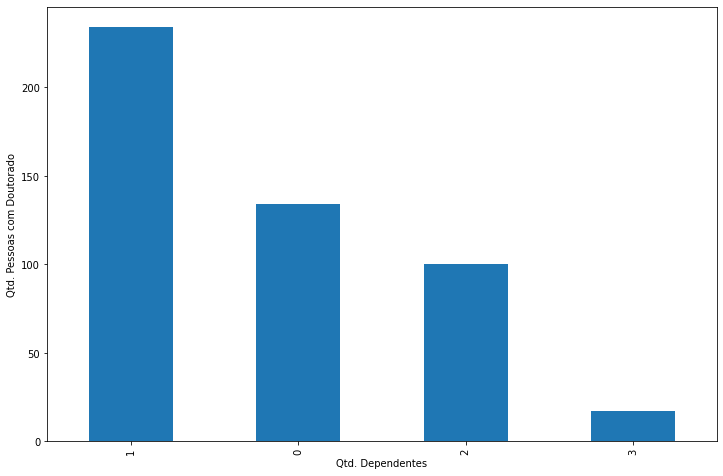

In [64]:
# plotagem gráfico de barra
dfphd.groupby(['total_dependentes']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Qtd. Dependentes',ylabel='Qtd. Pessoas com Doutorado')

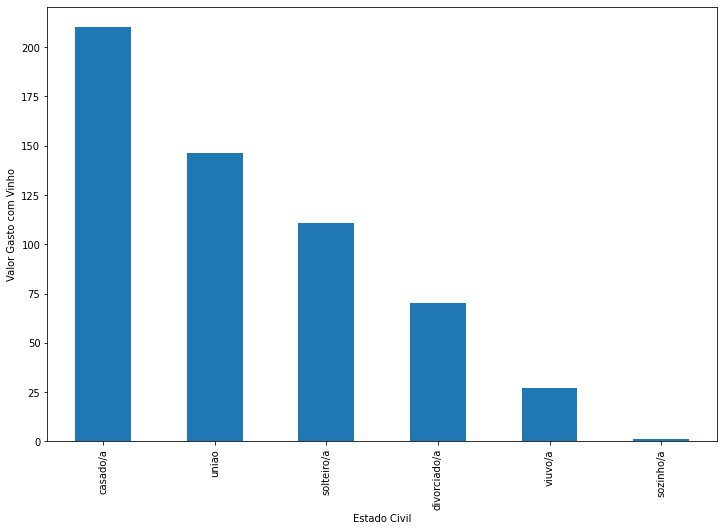

In [65]:
# plotagem de gráfico de barras
dfvinho.groupby(['est_civil']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Estado Civil',ylabel='Valor Gasto com Vinho')

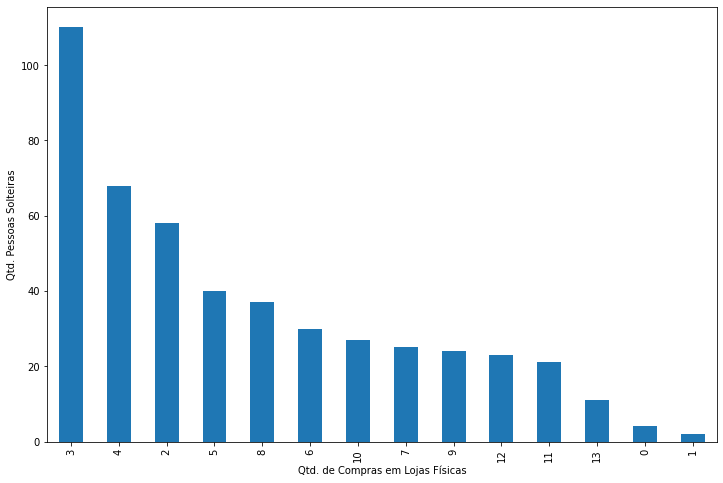

In [66]:
# plotagem gráfico de barras
dfestcivil.groupby(['ncompras_loja']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Qtd. de Compras em Lojas Físicas',ylabel='Qtd. Pessoas Solteiras')

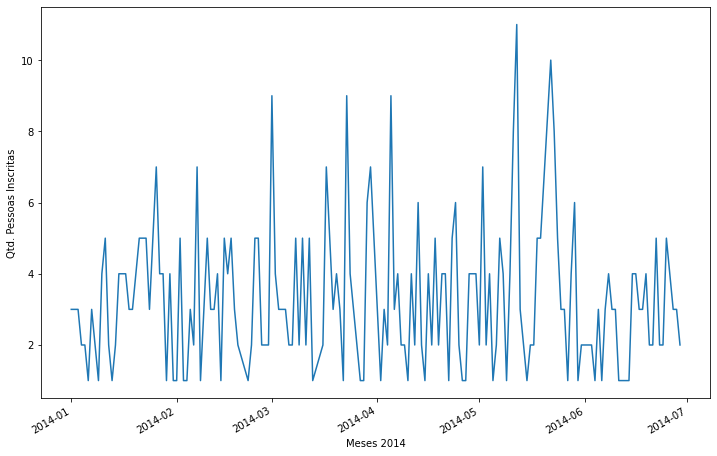

In [67]:
# quantidade de incrições por dia em 2014
df2014.groupby(['dia_inscricao']).size().sort_values(ascending=False).plot.line(figsize=(12,8),xlabel='Meses 2014',ylabel='Qtd. Pessoas Inscritas')

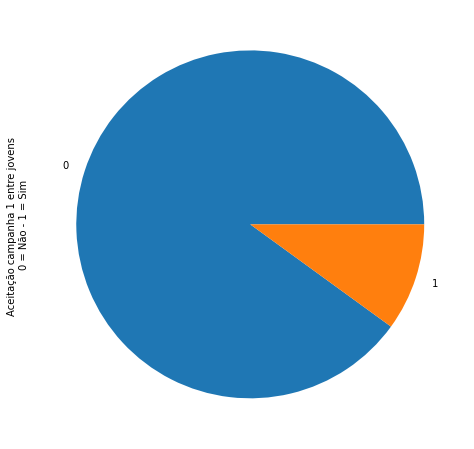

In [68]:
dfjovem.groupby(['acc_oferta1']).size().sort_values(ascending=False).plot.pie(ylabel='Aceitação campanha 1 entre jovens \n0 = Não - 1 = Sim', figsize=(8,8))

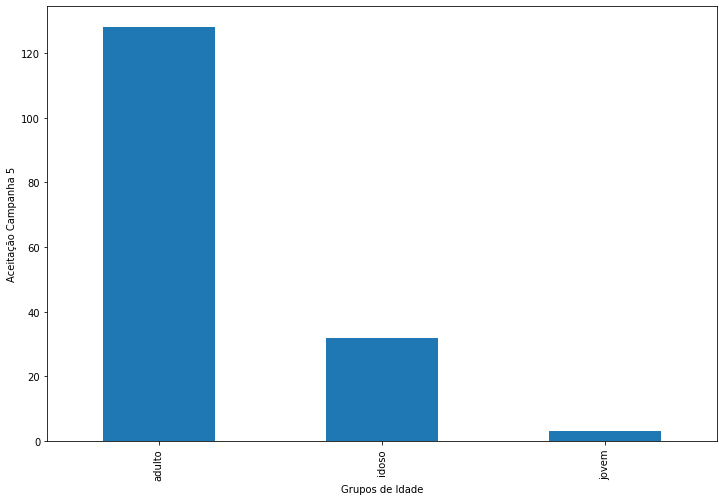

In [69]:
dfoferta5.groupby(['grupo_idade']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Grupos de Idade',ylabel='Aceitação Campanha 5')

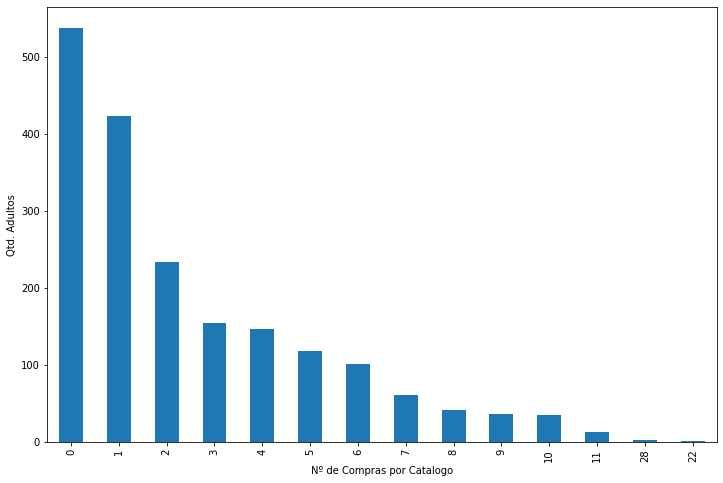

In [77]:
dfadulto.groupby(['ncompras_catalogo']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Nº de Compras por Catalogo',ylabel='Qtd. Adultos')

## Load

In [70]:
# validando o schema novamente
schema.validate(df)

,id,dia_inscricao,ano_nascimento,grupo_idade,escolaridade,est_civil,renda_anual,qtd_criancas,qtd_adolescentes,total_dependentes,qtd_dias_ultima_compra,vgasto_vinho,vgasto_frutas,vgasto_carne,vgasto_peixe,vgasto_doce,vgasto_ouro,ncompras_desconto,ncompras_catalogo,ncompras_loja,ncompras_site,nvisita_mes_site,acc_oferta1,acc_oferta2,acc_oferta3,acc_oferta4,acc_oferta5,acc_ofertafinal,reclamacao
0,5524,2012-09-04,1957,adulto,graduacao,solteiro/a,58138.0,0,0,0,58,635,88,546,172,88,88,3,10,4,8,7,0,0,0,0,0,1,0
1,2174,2014-03-08,1954,idoso,graduacao,solteiro/a,46344.0,1,1,2,38,11,1,6,2,1,6,2,1,2,1,5,0,0,0,0,0,0,0
2,4141,2013-08-21,1965,adulto,graduacao,uniao,71613.0,0,0,0,26,426,49,127,111,21,42,1,2,10,8,4,0,0,0,0,0,0,0
3,6182,2014-02-10,1984,adulto,graduacao,uniao,26646.0,1,0,1,26,11,4,20,10,3,5,2,0,4,2,6,0,0,0,0,0,0,0
4,5324,2014-01-19,1981,adulto,phd,casado/a,58293.0,1,0,1,94,173,43,118,46,27,15,5,3,6,5,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,adulto,graduacao,casado/a,61223.0,0,1,1,46,709,43,182,42,118,247,2,3,4,9,5,0,0,0,0,0,0,0
2236,4001,2014-06-10,1946,idoso,phd,uniao,64014.0,2,1,3,56,406,0,30,0,0,8,7,2,5,8,7,1,0,0,0,0,0,0
2237,7270,2014-01-25,1981,adulto,graduacao,divorciado/a,56981.0,0,0,0,91,908,48,217,32,12,24,1,3,13,2,6,0,0,0,1,0,0,0
2238,8235,2014-01-24,1956,adulto,mestrado,uniao,69245.0,0,1,1,8,428,30,214,80,30,61,2,5,10,6,3,0,0,0,0,0,0,0


In [62]:
# criando um noto dataset com informações filtradas
# utilizando index false, pois o rótulo é o padrão do pandas
dfadulto.to_csv('marketing_campaing.csv',index=False)